In [1]:
%matplotlib inline
from matplotlib import pylab
import matplotlib.pyplot as plt
import netCDF4 as NC
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from salishsea_tools import tidetools
from salishsea_tools import (nc_tools,viz_tools)
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
import matplotlib.cm as cm

from matplotlib import animation

from numpy import *
from pylab import *

from matplotlib import gridspec

import glob

In [2]:
rd = NC.Dataset('ariane_trajectories_qualitative.nc','r');
rd_lont=rd.variables['traj_lon'][:,1::2]
rd_latt=rd.variables['traj_lat'][:,1::2]
rd_dept=rd.variables['traj_depth'][:,1::2]
rd_xs=rd.variables['init_x'][:]
rd_ys=rd.variables['init_y'][:]
print rd_lont.shape


bathy=NC.Dataset(
    '/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy=bathy.variables['Bathymetry'][:,:]

nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/result_jasper/tracer6/*.nc'))
ptrc=NC.Dataset(nc_filename[0])
lon=ptrc.variables['nav_lon'][:]
lat=ptrc.variables['nav_lat'][:]
dep = ptrc.variables['deptht'][:]

print lon.min(),lon.max()

(55, 8)
-179.997 180.0


In [3]:
print rd_lont.min(),rd_lont.max()
print rd_lont[:,0]

-154.591471576 165.008191392
[-149.32897949 -149.40173894 -149.38519891 -149.45894702 -149.60877484
 -149.86877275 -150.27918642 -150.86500367 -151.37718826 -151.76086062
 -152.05019515 -152.25990652 -152.43142982 -152.6192535  -152.73393226
 -152.88084139 -153.06894848 -153.28210655 -153.50140113 -153.71716043
 -153.9677181  -154.14613728 -154.32369561 -154.45201515 -154.59147158
 -154.55869858 -154.50452663 -154.44638474 -154.37464774 -154.2482222
 -154.00609259 -153.64293701 -153.28664704 -152.98677481 -152.68559014
 -152.37034897 -152.03307958 -151.69117318 -151.36921716 -150.99826839
 -150.68668393 -150.41507952 -150.21071109 -150.01230097 -149.82746192
 -149.64542638 -149.39832062 -149.02977221 -148.64325078 -148.25640788
 -147.94640854 -147.72793242 -147.5971173  -147.47746209 -147.48801365]


In [4]:
# deep layer

Black points: end points


/home/xiaoxiny/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


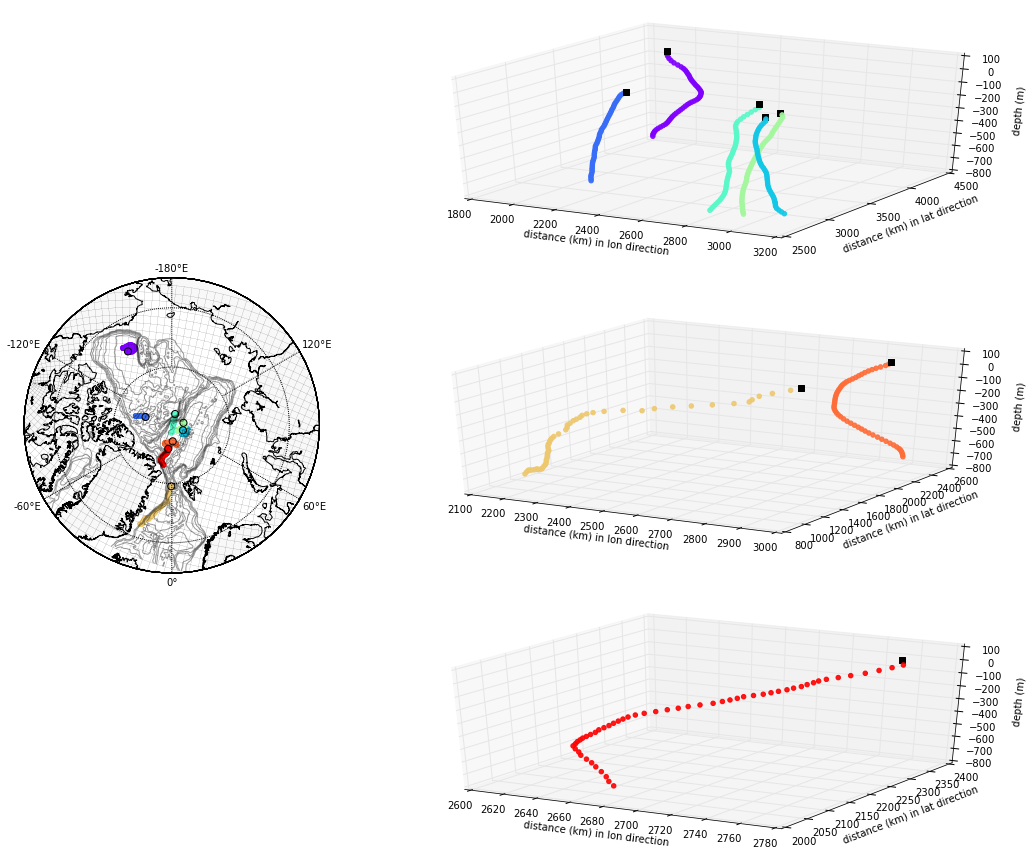

In [5]:
# 3D
n = np.arange(rd_lont.shape[1])
colors = cm.rainbow(np.linspace(0, 1, len(n)))
colors_ = cm.rainbow(np.linspace(0, 1, len(rd_xs)))


fig = plt.figure(figsize=(18,15))
gs = gridspec.GridSpec(3, 3)

ax = fig.add_subplot(gs[:,0])
m = Basemap(projection='npstere',boundinglat=65,lon_0=0,resolution='l',round=True)
m.drawcoastlines()
m.fillcontinents(color = '0.75',alpha=0.1)
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0, 0, 1, 1])
x_lon,y_lat = m(lon,lat)
m.plot(x_lon[::10,::10],y_lat[::10,::10],x_lon.T[::10,::10],y_lat.T[::10,::10],color='k',linewidth=0.1)
tracex,tracey=m(rd_lont,rd_latt)
for N,c in zip(n,colors):
    m.scatter(tracex[1:,N],tracey[1:,N],marker='o',color=c)

# 0/-2  backward/forward
k=0    
m.scatter(tracex[k,:],tracey[k,:],c=colors,s=50)
print 'Black points: end points'



m.contour(x_lon[420:-10,:],y_lat[420:-10,:],bathy[420:-10,:],linewidth=0.075,colors='black',alpha=0.4)
plt.legend()



ax =fig.add_subplot(gs[0,1:], projection='3d')

for N,c in zip(n[:-3],colors[:-3]):
    ax.scatter(tracex[1:,N]/1e3,tracey[1:,N]/1e3,rd_dept[1:,N],color=c,alpha=0.9) 
    ax.scatter(tracex[k,N]/1e3,tracey[k,N]/1e3,rd_dept[0,N],c='k',marker='s',s=30)
       
ax.set_xlabel('distance (km) in lon direction')
ax.set_ylabel('distance (km) in lat direction')
ax.set_zlabel('depth (m)')
ax.view_init(elev=30, azim=-60)
#ax.set_zlim(-1830,-1800)


ax =fig.add_subplot(gs[1,1:], projection='3d')

for N,c in zip(n[-3:-1],colors[-3:-1]):
    ax.scatter(tracex[1:,N]/1e3,tracey[1:,N]/1e3,rd_dept[1:,N],color=c,alpha=0.9) 
    ax.scatter(tracex[k,N]/1e3,tracey[k,N]/1e3,rd_dept[0,N],c='k',marker='s',s=30)
       
ax.set_xlabel('distance (km) in lon direction')
ax.set_ylabel('distance (km) in lat direction')
ax.set_zlabel('depth (m)')
ax.view_init(elev=30, azim=-60)
#ax.set_zlim(-1830,-1800)

ax =fig.add_subplot(gs[2,1:], projection='3d')

N,c=n[-1],colors[-1]
ax.scatter(tracex[1:,N]/1e3,tracey[1:,N]/1e3,rd_dept[1:,N],color=c,alpha=0.9) 
ax.scatter(tracex[k,N]/1e3,tracey[k,N]/1e3,rd_dept[0,N],c='k',marker='s',s=30)
       
ax.set_xlabel('distance (km) in lon direction')
ax.set_ylabel('distance (km) in lat direction')
ax.set_zlabel('depth (m)')
ax.view_init(elev=30, azim=-60)
#ax.set_zlim(-1830,-1800)

plt.show()